# ECBM E4040: Bottle fullness dataset classification
Goal: Train a custom model for the bottle fullness dataset classification problem. General training methods include:
    * Dropout
    * Batch normalization
    * l1-norm & l2-norm penalization

Data: 14300 Train, 3500 Test, 700 Validation. The data is ordered with 3k images for each category of fullness from 0, 1, 2, 3, 4. Data was aggregated and labeled by a class of deep learning students at Columbia University.

Architecture: similar to VGG but smaller network.

## Train your model here

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio
import glob

In [2]:
#import files for training set
train_data = []
try:
    #grab all files in train_128 file in order
    for im_path in glob.glob("all/train_128/*/*.png"):
        im = imageio.imread(im_path)
        train_data.append(im)
except BaseException:
    print('Something went wrong...')

In [ ]:
#import files for testing set
test_data = []
try:
    #grabs files in test set
    for i in range(3500):
        im_path="all/test_128/{}.png".format(i)
        im = imageio.imread(im_path)
        test_data.append(im)
        
    #Create test set
    X_test = np.array(test_data)
    
except BaseException:
    print('Something went wrong...')

In [4]:
#aggregate data sets
num_train = 14300
num_val = 700
num_test = 3500
num_dev = 128

#convert images to numpy array set as uint8 to save space
X_train = np.array(train_data, dtype = np.uint8)
y_train = np.ones([num_train + num_val], dtype = np.uint8)
for i in range(5):
    y_train[i*3000 : (i+1) * 3000] = i #create labels for each image

#shuffle the data
p = np.random.permutation(num_train+num_val) #create random array of indexes
X_train = X_train[p]
y_train = y_train[p]
                
#Create dev set and val set and training set
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

In [6]:
#Create generator for image data
from ecbm4040.image_generator import ImageGenerator
gen = ImageGenerator(X_train, y_train)

#add data to augment
#gen.flip(mode='h') # flips data horizontally
#gen.translate(3,3)
#gen.create_aug_data()

batch = gen.next_batch_gen(batch_size = 64, shuffle=False)

#gen.show(generator.x)

In [ ]:
from ecbm4040.neuralnets.kaggle import kaggleTraining
tf.reset_default_graph()

kaggleTraining(batch, X_val, y_val, 
         conv_featmap=[20],
         fc_units=[64],
         conv_kernel_size=[4],
         pooling_size=[2],
         l2_norm=0.01,
         seed=235,
         learning_rate=1e-2,
         epoch=20,
         batch_size=64,
         verbose=False,
         pre_trained_model = None)


Building my LeNet. Parameters: 
conv_featmap=[20]
fc_units=[64]
conv_kernel_size=[4]
pooling_size=[2]
l2_norm=0.01
seed=235
learning_rate=0.01
epoch 1 
Best validation accuracy! iteration:100 accuracy: 42.142857142857146%
epoch 2 
Best validation accuracy! iteration:300 accuracy: 60.714285714285715%
Best validation accuracy! iteration:400 accuracy: 65.42857142857143%
epoch 3 
Best validation accuracy! iteration:500 accuracy: 66.28571428571428%
epoch 4 
epoch 5 
Best validation accuracy! iteration:900 accuracy: 69.85714285714286%
epoch 6 
epoch 7 
Best validation accuracy! iteration:1300 accuracy: 71.14285714285714%
Best validation accuracy! iteration:1400 accuracy: 79.28571428571428%
epoch 8 
epoch 9 
Best validation accuracy! iteration:1700 accuracy: 80.28571428571428%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:2700 accuracy: 82.85714285714286%
epoch 15 
epoch 16 
epoch 17 
Best validation accuracy! iteration:3400 accuracy: 85.0%
epoch 18 


In [6]:
#making sure test set looks good
y_test = np.ones([num_test], dtype = np.uint8)
gen = ImageGenerator(X_test, y_test)

#gen.flip(mode='h') # flips data horizontally
#gen.translate(3,3)
#gen.create_aug_data()

batch = gen.next_batch_gen(batch_size = 1, shuffle=False)

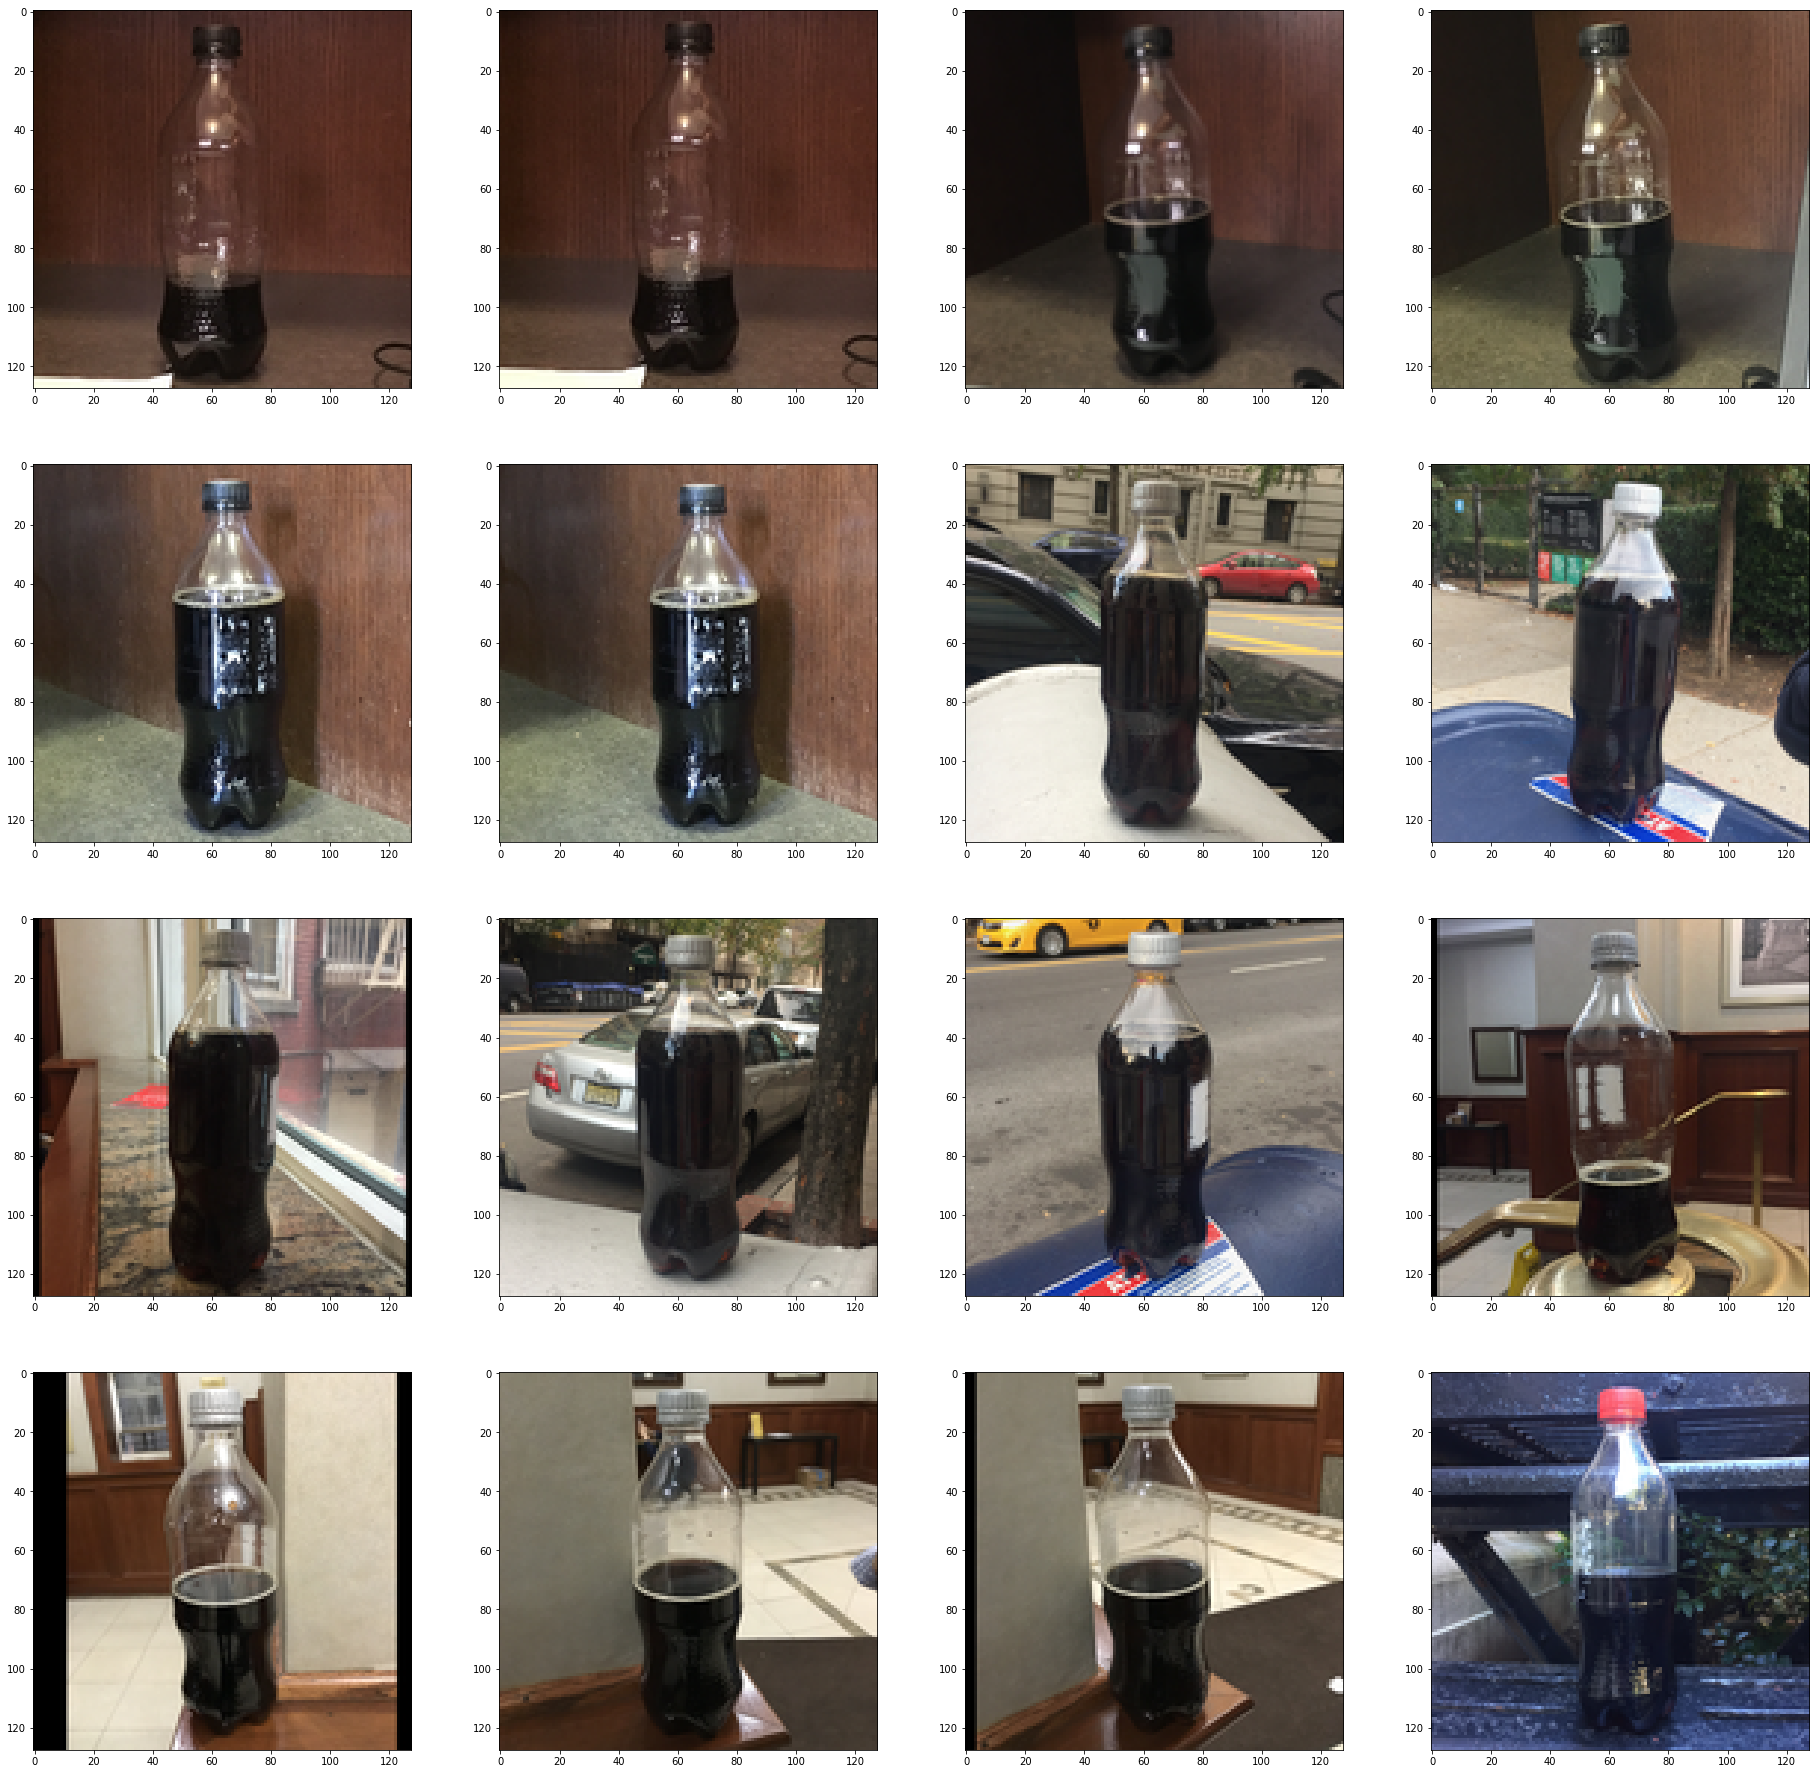

In [7]:
gen.show(X_test[:16])

## Save the best model

In [14]:
# YOUR CODE HERE
from ecbm4040.neuralnets.kaggle import test
tf.reset_default_graph()

pred = test(batch, 
         conv_featmap=[16],
         fc_units=[64],
         conv_kernel_size=[3],
         pooling_size=[2],
         l2_norm=0.01,
         seed=235,
         learning_rate=1e-2,
         epoch=1,
         batch_size=1,
         verbose=False,
         pre_trained_model = "lenet_1541105476")


Load the model from: lenet_1541105476
INFO:tensorflow:Restoring parameters from model/lenet_1541105476
